# Showcase the different $\alpha$ - profiles included in this module

## Remember that in a disk in stady-state, the surface density $\Sigma$ and viscous turbulence $\alpha$ profiles are correlated through : 

$\huge 3\pi \alpha \Sigma = \dot{M}$

## Profiles quasi steady-state will (approximately) also scale  up by a similar value

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import dustpy
from dustpy import Simulation
from dustpy import constants as c


from dustpy import hdf5writer
from dustpy import plot

In [2]:
sp = 17
plt.rc('font', size=sp)                # controls default text sizes
plt.rc('axes', titlesize=sp)           # fontsize of the axes title
plt.rc('axes', labelsize=sp)           # fontsize of the x and y labels
plt.rc('xtick', labelsize=sp)          # fontsize of the tick labels
plt.rc('ytick', labelsize=sp)          # fontsize of the tick labels
plt.rc('legend', fontsize=sp)          # legend fontsize

plt.rc('lines', linewidth=2)

height = 5
width = 8

## Import the available setup routines

In [3]:
sys.path.append("../")
from setup_alphaProfiles import setup_profile_bumps
from setup_alphaProfiles import setup_profile_deadzone

## Default Dustpy Simulation

In [4]:
def InitDefaultSim():
    sim = Simulation()
    sim.ini.grid.Nr = 250
    sim.ini.grid.rmin = 2.5 * c.au
    sim.ini.grid.rmax = 250 * c.au
    sim.initialize()
    return sim

sim = InitDefaultSim()
r = sim.grid.r
Sigma_default = sim.gas.Sigma
Alpha_default = sim.gas.alpha

In [5]:
def plot_AlphaSigma(Sigma = None, Alpha = None, label = ""):
    fig, axes = plt.subplots(2, 1, figsize=(width, height*1.75), sharex = True)

    axes[0].set_ylabel(r"$\alpha$")
    axes[1].set_ylabel(r"$\Sigma_g$ (g/cm$^2$)")
    axes[1].set_xlabel(r"r (AU)")

    axes[0].set_xlim([2.5, 250])
    axes[0].set_ylim([1.e-4, 1.e-2])
    axes[1].set_ylim([1.e-2, 1.e4])

    axes[0].loglog(r/c.au, Alpha_default, 'k:')
    axes[1].loglog(r/c.au, Sigma_default, 'k:', label = 'Default')
    if Sigma is not None and Alpha is not None:
        axes[0].loglog(r/c.au, Alpha, 'r:')
        axes[1].loglog(r/c.au, Sigma, 'r:', label = label)
    axes[1].legend(loc=3)
    plt.tight_layout()

# DEMONSTRATION OF THE BUMP/GAP PROFILES

In [6]:
# Showcase the setup description
# setup_profile_bumps?

## Example with a single GAP to the surface density by adding a single bump to the alpha profile

Alpha profile (inversily) applied to the surface density.
The total disk mass is modified by a factor of  0.953.


New Dustpy group and fields

Group (Gaussian bump parameters, as in Stadler et al. (2022))
    - Amplitude: Field (Amplitude of the gaussian bump)
    - Location: Field (Location of the bump center (cm))
    - Type: Field (Perturbation type in the gas surface density: GAP or BUMP)
    - Width: Field (FWHM of the gaussiam bump (in gas scale heights))
None


<IPython.core.display.Javascript object>


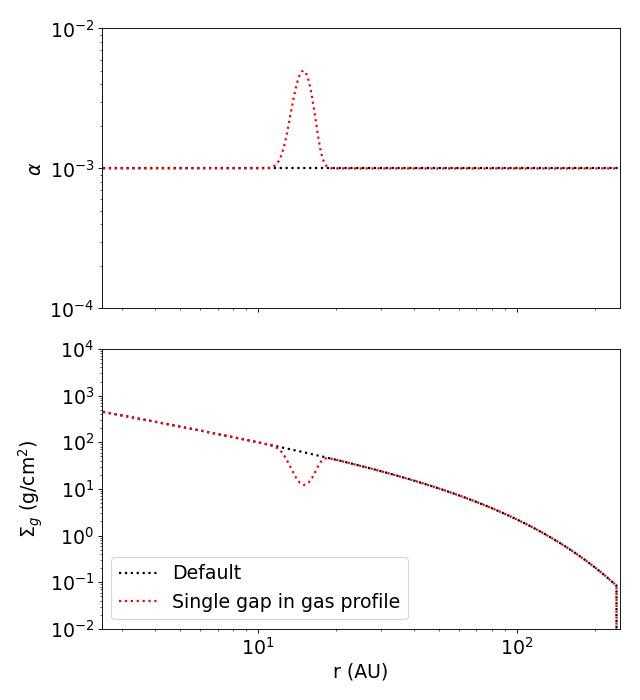

In [7]:
sim = InitDefaultSim()
setup_profile_bumps(sim, Location = 15 * c.au, Amplitude = 4., Width = 3.)

print("\n\nNew Dustpy group and fields\n")
print(sim.gas.GaussianBumps.toc)
plot_AlphaSigma(sim.gas.Sigma, sim.gas.alpha, "Single gap in gas profile")

## Example with multiple gaps in the gas surface density

Alpha profile (inversily) applied to the surface density.
The total disk mass is modified by a factor of  0.901.


<IPython.core.display.Javascript object>


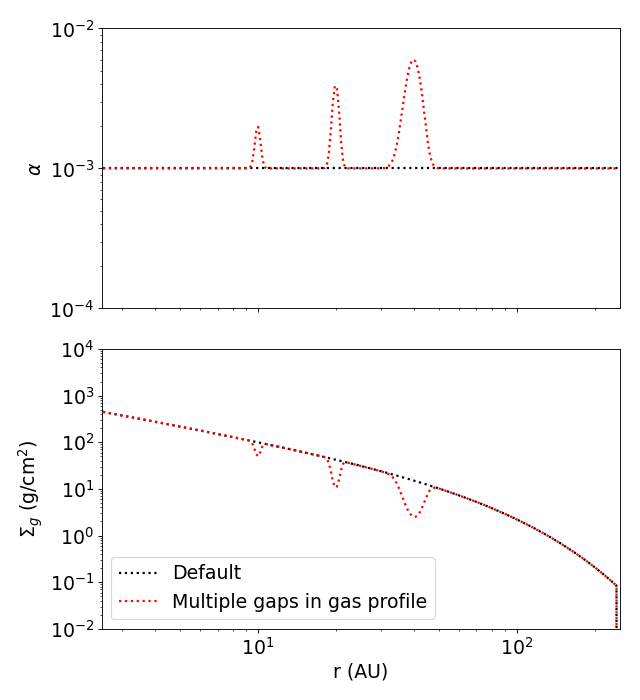

In [8]:
sim = InitDefaultSim()
locations = np.array([10, 20, 40]) * c.au
amplitudes = [1, 3, 5]
widths = [1, 1, 2]

setup_profile_bumps(sim, Location = locations, Amplitude = amplitudes, Width = widths, GasBumpType='GAP',
                    apply_to_sigma=True)

plot_AlphaSigma(sim.gas.Sigma, sim.gas.alpha, "Multiple gaps in gas profile")

## Example with bumps in the gas surface density profile (instead of gaps)

Alpha profile (inversily) applied to the surface density.
The total disk mass is modified by a factor of  1.351.


<IPython.core.display.Javascript object>


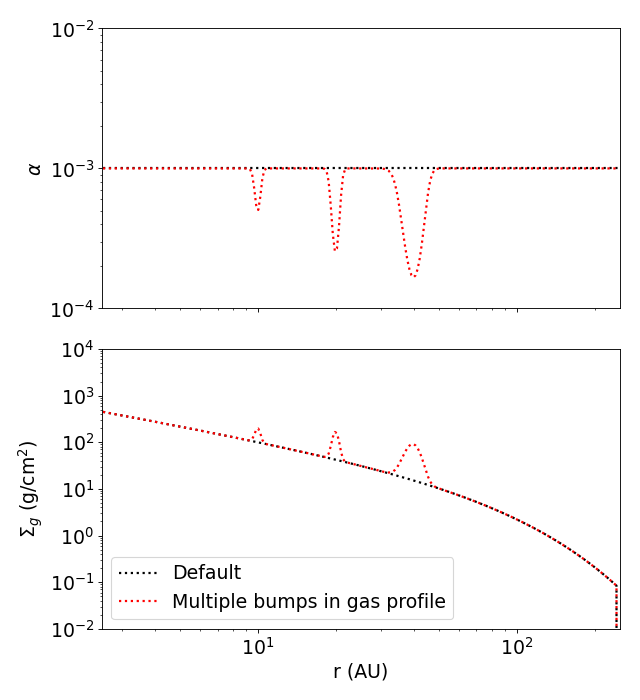

In [9]:
sim = InitDefaultSim()
locations = np.array([10, 20, 40]) * c.au
amplitudes = [1, 3, 5]
widths = [1, 1, 2]

setup_profile_bumps(sim, Location = locations, Amplitude = amplitudes, Width = widths, GasBumpType='BUMP',
                    apply_to_sigma=True)

plot_AlphaSigma(sim.gas.Sigma, sim.gas.alpha, "Multiple bumps in gas profile")

## Correction of the total disk mass by scaling up the profile

Alpha profile (inversily) applied to the surface density.
The surface density profiles were corrected by a scale factor of  1.110 to match the initial disk mass.


<IPython.core.display.Javascript object>


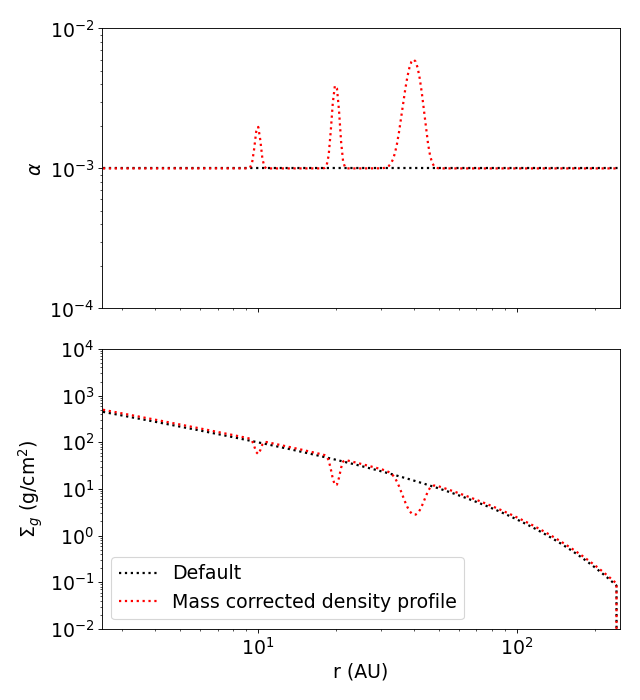

In [10]:
sim = InitDefaultSim()
locations = np.array([10, 20, 40]) * c.au
amplitudes = [1, 3, 5]
widths = [1, 1, 2]

setup_profile_bumps(sim, Location = locations, Amplitude = amplitudes, Width = widths, GasBumpType='GAP',
                    apply_to_sigma=True, correct_mass=True)

plot_AlphaSigma(sim.gas.Sigma, sim.gas.alpha, "Mass corrected density profile")

## Example without the initial perturbation in the density profile

<IPython.core.display.Javascript object>


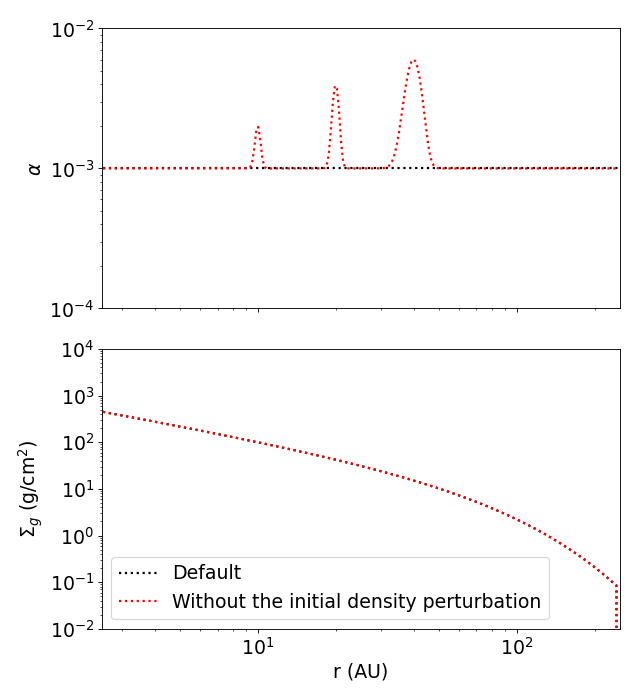

In [11]:
sim = InitDefaultSim()
locations = np.array([10, 20, 40]) * c.au
amplitudes = [1, 3, 5]
widths = [1, 1, 2]

setup_profile_bumps(sim, Location = locations, Amplitude = amplitudes, Width = widths, GasBumpType='GAP',
                    apply_to_sigma=False)

plot_AlphaSigma(sim.gas.Sigma, sim.gas.alpha, "Without the initial density perturbation")

# DEMONSTRATION OF THE DEAD ZONE PROFILE

Alpha profile (inversily) applied to the surface density.
The surface density profiles were corrected by a scale factor of  0.548 to match the initial disk mass.


New Dustpy group and fields

Group (Dead Zone parameters, as in Garate et al.(2019, 2021))
    - alpha_active: Field (Alpha turbulence in the MRI active region)
    - alpha_dead: Field (Alpha turbulence in the dead zone active region)
    - outer_radii: Field (Outer boundary of the dead zone (cm))
    - transition_width: Field (Transition width of the dead zone (cm))
None


<IPython.core.display.Javascript object>


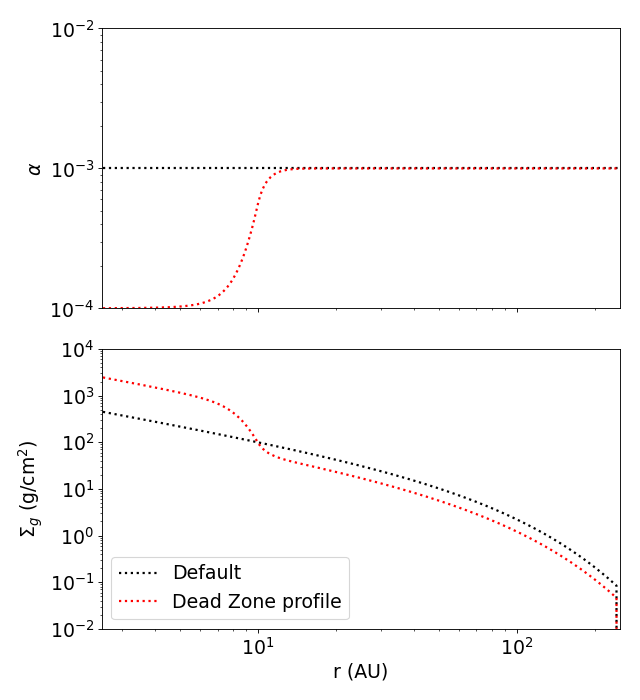

In [12]:
sim = InitDefaultSim()
setup_profile_deadzone(sim, alpha_active = sim.ini.gas.alpha, alpha_dead = 1.e-4,
                       r_dz_outer = 10*c.au, width_dz_outer = 1 * c.au, 
                       apply_to_sigma=True)

print("\n\nNew Dustpy group and fields\n")
print(sim.gas.DeadZone.toc)
plot_AlphaSigma(sim.gas.Sigma, sim.gas.alpha, "Dead Zone profile")